### Adventurework Försäljningsanalys
#### Styfte med analysen:
Denna analys för att undersöka försäljningsdata från AdventureWorks-databasen
för att identifiera mönster inom produktutbud, försäljning över tid, kundbeteenden samt
regionella skillnader.
Målet med analysen är att ge affärsinsikter som kan stödja strategiska beslut gällande sortement, marknadsföring och kundfokus. 
I denna uppgift använder vi python för visualisering och analysering. och SQL för att hämtar data från databasen.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sqlalchemy")

user = 'SA'
password = quote_plus("Salamjan1")
server = 'localhost,1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")

connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)

try:
   
   with engine.connect() as conn:
        print(conn.execute(text("SELECT")).fetchone())
except Exception as e:
    print("Connection failed:", e)


Connection failed: (pyodbc.ProgrammingError) ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Incorrect syntax near 'SELECT'. (102) (SQLExecDirectW)")
[SQL: SELECT]
(Background on this error at: https://sqlalche.me/e/20/f405)


C:\Users\zanya\AppData\Local\Temp\ipykernel_11952\3578548891.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect() as conn:


#### sql_1, Visualisering1 Antal produkter per kategori
Affärsfråga: Hur många produkter finns i varje kategori?
Visualiserings krav: Vertikalstapeldiagram.
Vi kopplar samman produkt, Subkategori och huvudkategori.




Visualisering 1: Antal produkter per kategori


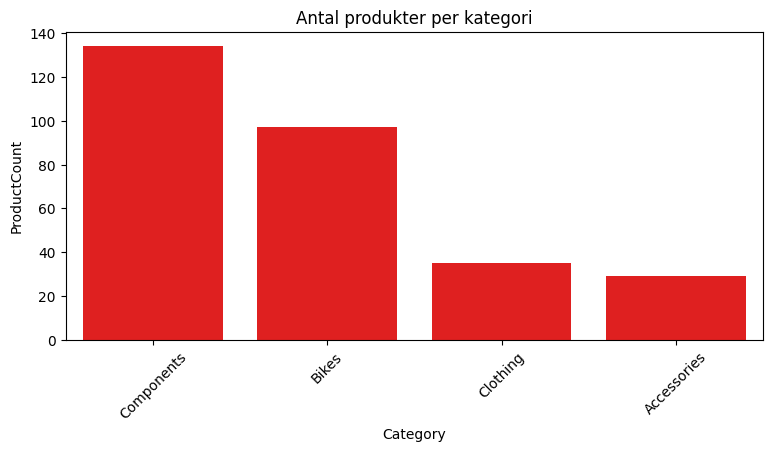

Diagramet visar ategori med flest produkter.


In [26]:
print("\n" + "" * 50)
print("Visualisering 1: Antal produkter per kategori")
print("="*50)
sql_1 = """
SELECT
    pc.Name AS Category,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory ps ON pc.ProductCategoryID=ps.ProductCategoryID
JOIN Production.Product p ON ps.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProducTCount DESC
"""
   

df1 = pd.read_sql(sql_1, engine)

plt.figure(figsize=(9,4))
sns.barplot(data=df1, x='Category', y='ProductCount',  color='red')
plt.title("Antal produkter per kategori")
plt.xticks(rotation=45)
plt.show()
print("Diagramet visar ategori med flest produkter.")


### Visualisering 2: Antal prdukter per försäljning.

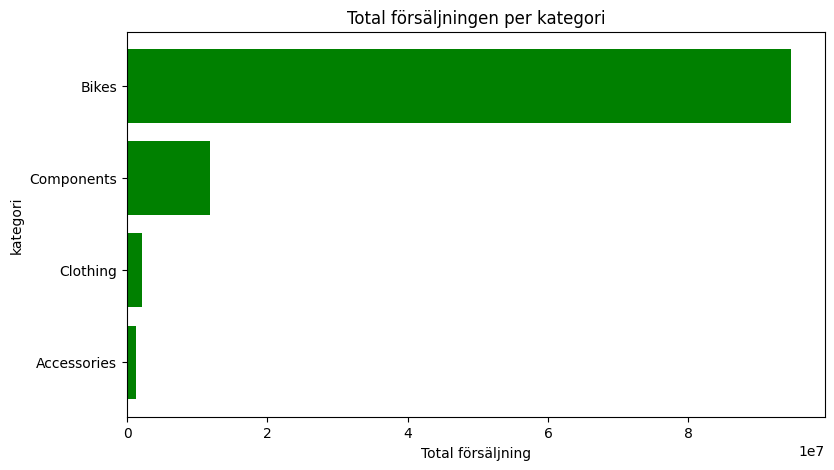

In [27]:
sql_2 = """
SELECT
    pc.Name AS Category,
    SUM(sod.LineTotal) AS Totalsales
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p
    ON sod.ProductID = p.ProductID
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID

GROUP BY pc.Name
ORDER BY Totalsales DESC
"""

df2 = pd.read_sql(sql_2, engine)

plt.figure(figsize=(9,5))
plt.barh(df2['Category'], df2['Totalsales'], color='green')
plt.title("Total försäljningen per kategori")
plt.xlabel("Total försäljning")
plt.gca().invert_yaxis()
plt.ylabel("kategori")
plt.show()


### Försäljning per månad:

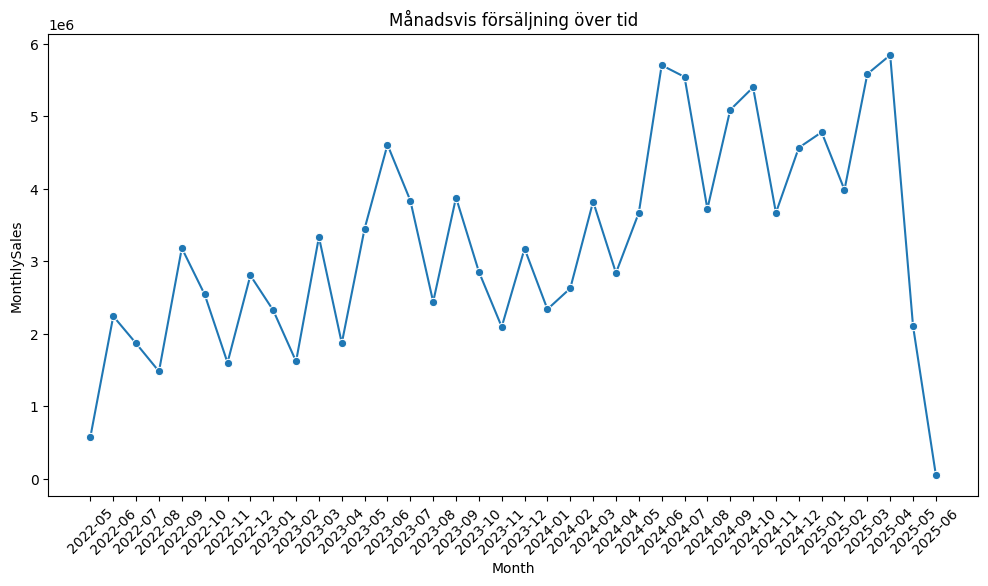

In [28]:
sql_3 = """
SELECT
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    SUM(TotalDue) AS MonthlySales
FROM Sales.SalesOrderHeader
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
ORDER BY Month ASC;
"""

df3 = pd.read_sql(sql_3, engine)

plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='Month', y='MonthlySales', marker='o')
plt.title("Månadsvis försäljning över tid")
plt.xticks(rotation=45)
plt.show()

#### Vis 4 försäljning och antal ordrar per år.

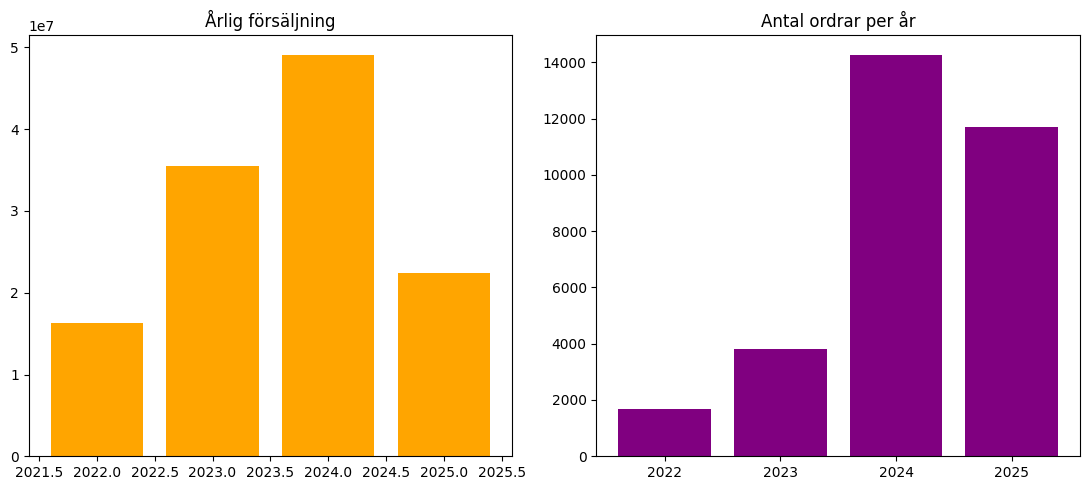

2024 hade mest försäljning och ordrar hittills.


In [29]:
sql_4 = """
SELECT
    YEAR(OrderDate) as År,
    SUM(TotalDue) AS Försäljning,
    COUNT(*) as Ordrar
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY År
"""
df4 = pd.read_sql(sql_4, engine)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
ax1.bar(df4['År'], df4['Försäljning'], color='orange')
ax1.set_title("Årlig försäljning")
ax2.bar(df4['År'].astype(str), df4['Ordrar'], color='purple')
ax2.set_title("Antal ordrar per år")
plt.tight_layout()  
plt.show()
print("2024 hade mest försäljning och ordrar hittills.")

### 5. Top 5 produkter

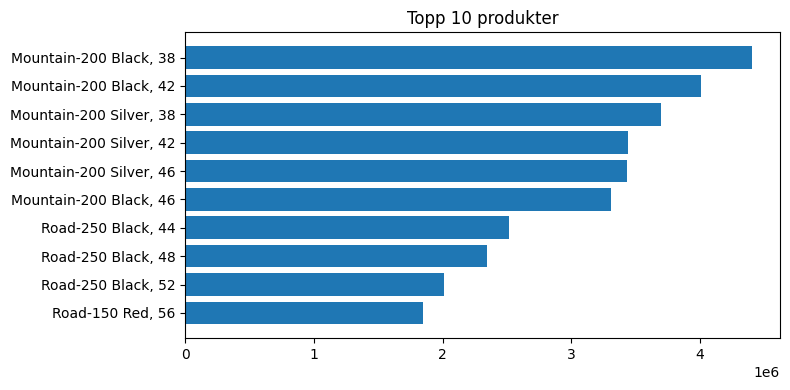

Topp 10 produkter visas i horisontell stapeldiagram.


In [30]:
sql_5 = """
SELECT TOP 10
    p.Name,
    SUM(sod.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p ON sod.ProductID = p.ProductID
GROUP BY p.Name
ORDER BY TotalSales DESC
"""
df5 = pd.read_sql(sql_5, engine)
plt.figure(figsize=(8,4))
plt.barh(df5['Name'], df5['TotalSales'])
plt.title("Topp 10 produkter")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print ("Topp 10 produkter visas i horisontell stapeldiagram.")

## 6. Region

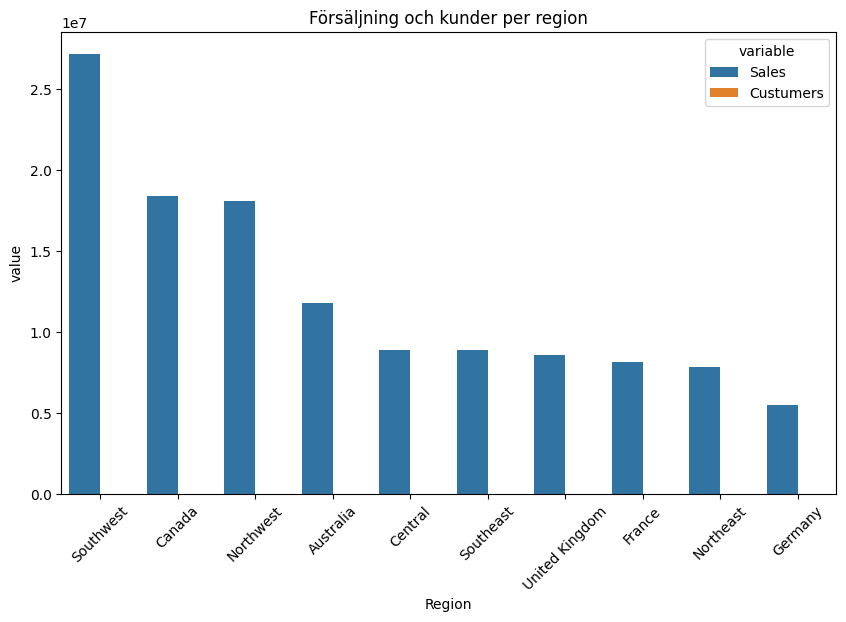

In [31]:
sql_6 = """

SELECT
    st.Name AS Region,
    SUM(soh.TotalDue) AS Sales,
    COUNT(DISTINCT soh.SalesOrderID) AS Custumers
FROM Sales.SalesOrderHeader soh
    JOIN Sales.Customer c
    ON soh.CustomerID = c.CustomerID
    JOIN Sales.SalesTerritory st
    ON c.TerritoryID = st.TerritoryID
GROUP BY st.Name
ORDER BY Sales DESC
"""

df6 = pd.read_sql(sql_6, engine)

df6_melt = df6.melt(id_vars='Region', value_vars=['Sales', 'Custumers'])
plt.figure(figsize=(10,6))
sns .barplot(data=df6_melt, x='Region', y='value', hue='variable')
plt.xticks(rotation=45)
plt.title("Försäljning och kunder per region")
plt.show()

### 7.Genomsnitt ordervärde:

In [32]:
sql_7 = """
SELECT
    st.Name as Region,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END AS Kundtyp,
    AVG(sol.TotalDue) AS Genomsnitt
FROM Sales.SalesOrderHeader soh
JOIN Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN Sales.SalesTerritory st ON soh.TerritoryID = st.TerritoryID
GROUP BY st.Name,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END
ORDER BY Region
"""
df7 = pd.read_sql(sql_7, engine)    

df7_pivot = df7.pivot(index='Region', columns='Kundtyp', values='Genomsnitt')
df7_pivot.plot(kind='bar')
plt.figure(figsize=(8,4))
plt.title("Genomsnittlig ordervärde per region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Storer-kunder köper mer per order')

ProgrammingError: (pyodbc.ProgrammingError) ('42000', '[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The multi-part identifier "sol.TotalDue" could not be bound. (4104) (SQLExecDirectW)')
[SQL: 
SELECT
    st.Name as Region,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END AS Kundtyp,
    AVG(sol.TotalDue) AS Genomsnitt
FROM Sales.SalesOrderHeader soh
JOIN Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN Sales.SalesTerritory st ON soh.TerritoryID = st.TerritoryID
GROUP BY st.Name,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END
ORDER BY Region
]
(Background on this error at: https://sqlalche.me/e/20/f405)